## 2D CNN in TensorFlow 2.0 - Build Your First Cifar10 Image Classifier in TensorFlow 2.0 

Watch Full Lesson Here: https://youtu.be/7gGxBGvSAa0

## What is CNN 

![alt text](https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

# Important Terms of CNN 

## Convolutional Layer 

![alt text](https://adeshpande3.github.io/assets/Cover.png)

## Activation Function 

![alt text](https://isaacchanghau.github.io/img/deeplearning/activationfunction/intro.png)

![alt text](https://miro.medium.com/max/1192/1*4ZEDRpFuCIpUjNgjDdT2Lg.png)

## Filter or Kernel Size and  Number of Filters 

![alt text](https://i2.wp.com/i.stack.imgur.com/qmf0m.jpg)

## Stride Size 

## Padding 

<img src = "https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/keras-conv2d/keras_conv2d_padding.gif">

## Max Pooling

![alt text](https://qph.fs.quoracdn.net/main-qimg-98ecf7ba49710bf56042d035a74505b6)

## Flattening and Dense Layer 

In between the convolutional layer and the fully connected layer, there is a 'Flatten' layer. Flattening transforms a two-dimensional matrix of features into a vector that can be fed into a fully connected neural network classifier.

## Download Data and Model Building

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 46kB/s 
     |████████████████████████████████| 4.3MB 33.4MB/s 
     |████████████████████████████████| 501kB 44.0MB/s 


In [2]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 3.5MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [3]:
print(tf.__version__)

2.0.0-rc0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [5]:
from tensorflow.keras.datasets import cifar10

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 349s 2us/step


In [7]:
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
X_train.max()

255

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
X_test.shape

(10000, 32, 32, 3)

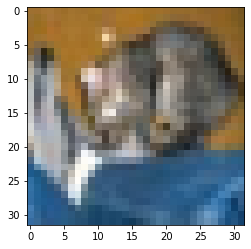

In [12]:
plt.imshow(X_test[0])

In [13]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## Build CNN Model

In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape = [32, 32, 3]))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))




model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [16]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [17]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 235s 5ms/sample - loss: 1.4047 - sparse_categorical_accuracy: 0.4977 - val_loss: 1.2237 - val_sparse_categorical_accuracy: 0.5816
Epoch 2/10
50000/50000 [==============================] - 200s 4ms/sample - loss: 1.0833 - sparse_categorical_accuracy: 0.6165 - val_loss: 0.9850 - val_sparse_categorical_accuracy: 0.6527
Epoch 3/10
50000/50000 [==============================] - 198s 4ms/sample - loss: 0.9623 - sparse_categorical_accuracy: 0.6599 - val_loss: 0.9408 - val_sparse_categorical_accuracy: 0.6703
Epoch 4/10
50000/50000 [==============================] - 199s 4ms/sample - loss: 0.8748 - sparse_categorical_accuracy: 0.6896 - val_loss: 0.8948 - val_sparse_categorical_accuracy: 0.6851
Epoch 5/10
50000/50000 [==============================] - 6778s 136ms/sample - loss: 0.8023 - sparse_categorical_accuracy: 0.7151 - val_loss: 0.8882 - val_sparse_categorical_accuracy: 0.6900
Epoch 6

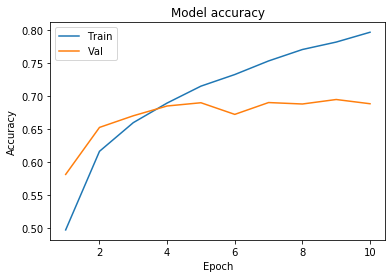

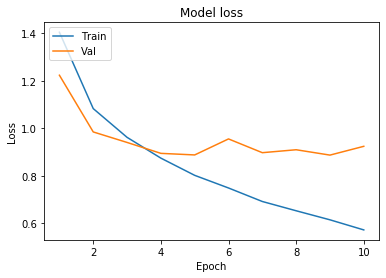

In [20]:
# Plot training & validation accuracy values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [21]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [22]:
y_pred = model.predict_classes(X_test)

In [23]:
y_pred

array([5, 8, 8, ..., 5, 1, 7], dtype=int64)

In [24]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [25]:
mat = confusion_matrix(y_test, y_pred)

In [26]:
mat

array([[644,  31, 103,  31,  22,   6,   9,  21,  84,  49],
       [  7, 838,   6,  10,   5,   3,   8,   2,  26,  95],
       [ 36,   4, 575,  74,  96,  73,  72,  49,  13,   8],
       [ 10,  14,  77, 477,  66, 232,  58,  47,  10,   9],
       [ 16,   2,  68,  74, 639,  61,  56,  75,   7,   2],
       [  5,   3,  69, 183,  48, 606,  29,  53,   2,   2],
       [  3,   8,  33,  79,  54,  29, 775,  11,   5,   3],
       [ 16,   2,  36,  45,  36,  80,  12, 759,   4,  10],
       [ 38,  46,  32,  13,   6,   8,   3,   7, 819,  28],
       [ 22, 141,   6,  17,   2,   6,   4,  20,  29, 753]], dtype=int64)

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x452faad5c8>)

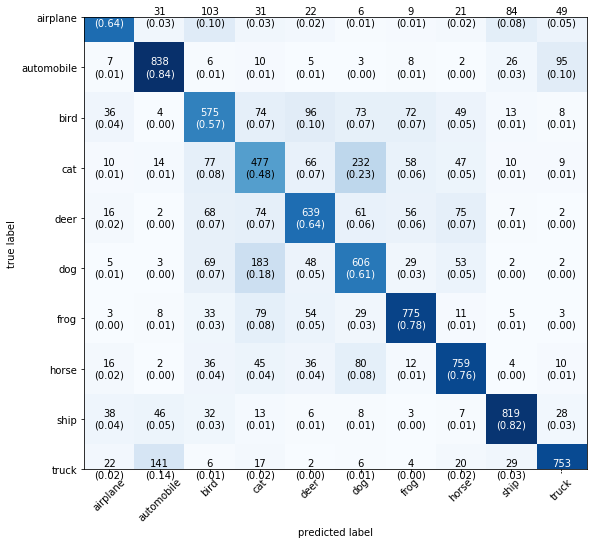

In [27]:
plot_confusion_matrix(mat,figsize=(9,9), class_names=classes_name, show_normed=True)